LETTER

In [1]:
# IMPORT THƯ VIỆN CẦN THIẾT 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from random import sample
import random
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix
from sklearn import tree
from math import log,exp
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, plot_confusion_matrix


In [2]:
letter = pd.read_csv("letters_CG.csv")
letter.head()
print(letter)


     Class  x-box  y-box  width  high  onpix  x-bar  y-bar  x2bar  y2bar  \
0        C      4     10      5     8      2      5      7      7     10   
1        C      3      5      4     4      2      4      8      5      7   
2        G      5     10      6     7      3      8      7      8      8   
3        C      5      9      6     7      4      3      8      6      7   
4        G      4      8      5     6      3      6      6      7      6   
...    ...    ...    ...    ...   ...    ...    ...    ...    ...    ...   
1504     C      5     10      6     8      4      5      8      9      9   
1505     C      6     11      7     8      4      6      7     10      9   
1506     G      5      9      6     7      4      6      7      6      6   
1507     C      6     11      7     8      5      5      8      7      6   
1508     C      5     10      5     8      3      6      8      7      7   

      xybar  x2ybr  xy2br  x-ege  xegvy  y-ege  yegvx  
0         7      6     13      

In [3]:
# Xét hai lớp C và G của lớp Class
variable = letter[(letter['Class'] == 'C') | (letter['Class'] == 'G')]

In [4]:
variable.head(1)

,Class,x-box,y-box,width,high,onpix,x-bar,y-bar,x2bar,y2bar,xybar,x2ybr,xy2br,x-ege,xegvy,y-ege,yegvx
0,C,4,10,5,8,2,5,7,7,10,7,6,13,1,8,4,9


In [ ]:
variable.columns

Index(['Class', 'x-box', 'y-box', 'width', 'high', 'onpix', 'x-bar', 'y-bar',
       'x2bar', 'y2bar', 'xybar', 'x2ybr', 'xy2br', 'x-ege', 'xegvy', 'y-ege',
       'yegvx'],
      dtype='object')

In [5]:
letter["Class"].value_counts()

G    773
C    736
Name: Class, dtype: int64

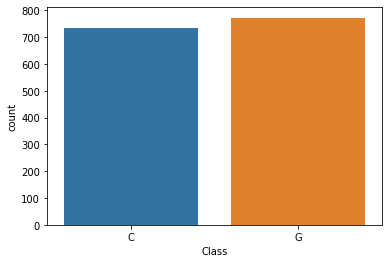

In [6]:
sns.countplot( x =letter['Class'])

In [7]:
#Đặt lại hai lớp với giá trị +1 and -1
variable['Label'] = variable['Class'].replace(to_replace = ['C','G'], value=[1,-1])

In [8]:
X = letter.drop('Class', axis = 1)
y = letter['Class']
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.3, train_size=0.7, random_state=101)

In [9]:
#có tác dụng chuyển đổi dữ liệu đào tạo và chỉ chuyển đổi dữ liệu kiểm tra
scaler_train= StandardScaler()
scaler_train.fit(X_train)
scaler_test= StandardScaler()
scaler_test.fit(X_test)
X_train_scaled= scaler_train.transform(X_train)
X_test_scaled= scaler_test.transform(X_test)

In [22]:
tree_model = DecisionTreeClassifier()
tree_model = tree_model.fit(X_train,y_train)
y_pred = tree_model.predict(X_test)

In [23]:
clf = AdaBoostClassifier(n_estimators=4, random_state=0)
clf.fit(X_train, y_train)
clf.fit(X_test, y_test)

AdaBoostClassifier(n_estimators=4, random_state=0)

In [24]:
clf.score(X_train, y_train)

0.8674242424242424

In [25]:
clf.score(X_test, y_test)

0.891832229580574

In [17]:
#lắp mô hình DT với độ một sâu 
clf_gini = DecisionTreeClassifier(criterion = "gini", random_state = 200, max_depth=1)
clf = clf_gini.fit(X_train, y_train)

[Text(0.5, 0.75, 'X[11] <= 11.5\ngini = 0.5\nsamples = 1056\nvalue = [512, 544]'),
 Text(0.25, 0.25, 'gini = 0.405\nsamples = 695\nvalue = [196, 499]'),
 Text(0.75, 0.25, 'gini = 0.218\nsamples = 361\nvalue = [316, 45]')]

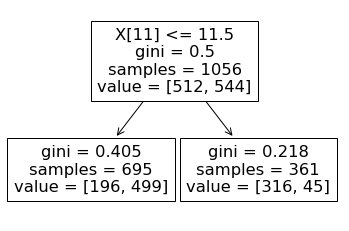

In [18]:
tree.plot_tree(clf)

SPAM EMAIL

In [26]:
# IMPORT THƯ VIỆN CẦN THIẾT 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from random import sample
import random
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix
from sklearn import tree
from math import log,exp
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, plot_confusion_matrix

In [27]:
spam = pd.read_csv("spam_email.csv")
spam.head()
print(spam)

      make  address   all   3d   our  over  remove  internet  order  mail  \
0     0.00     0.00  0.29  0.0  0.00  0.00    0.00      0.00   0.00  0.00   
1     0.46     0.00  0.00  0.0  0.00  0.00    0.00      0.00   0.00  0.00   
2     0.00     0.00  0.00  0.0  0.00  0.00    0.00      0.00   0.00  0.00   
3     0.33     0.44  0.37  0.0  0.14  0.11    0.00      0.07   0.97  1.16   
4     0.00     2.08  0.00  0.0  3.12  0.00    1.04      0.00   0.00  0.00   
...    ...      ...   ...  ...   ...   ...     ...       ...    ...   ...   
4596  0.00     0.00  0.53  0.0  0.00  0.53    0.00      0.00   0.00  0.53   
4597  0.00     0.00  0.00  0.0  0.00  0.00    0.00      0.00   0.00  0.00   
4598  0.00     0.00  0.00  0.0  0.00  0.00    0.00      0.00   0.00  0.00   
4599  0.00     0.00  0.00  0.0  0.00  0.00    0.00      0.00   0.00  0.00   
4600  0.13     0.26  0.52  0.0  0.26  0.00    0.13      0.00   0.00  0.39   

      ...  semicol  paren  bracket   bang  dollar  pound  cap_avg  cap_long

In [28]:
# Xét hai lớp ham và spam của lớp Class
variable = spam[(spam['Class'] == 'ham') | (spam['Class'] == 'spam')]

In [29]:
variable.head(1)

,make,address,all,3d,our,over,remove,internet,order,mail,...,semicol,paren,bracket,bang,dollar,pound,cap_avg,cap_long,cap_total,Class
0,0.0,0.0,0.29,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.178,0.0,0.044,0.0,0.0,1.666,10,180,ham


In [30]:
variable.columns

Index(['make', 'address', 'all', '3d', 'our', 'over', 'remove', 'internet',
       'order', 'mail', 'receive', 'will', 'people', 'report', 'addresses',
       'free', 'business', 'email', 'you', 'credit', 'your', 'font', '0',
       'money', 'hp', 'hpl', 'george', '650', 'lab', 'labs', 'telnet', '857',
       'data', '415', '85', 'technology', '1999', 'parts', 'pm', 'direct',
       'cs', 'meeting', 'original', 'project', 're', 'edu', 'table',
       'conference', 'semicol', 'paren', 'bracket', 'bang', 'dollar', 'pound',
       'cap_avg', 'cap_long', 'cap_total', 'Class'],
      dtype='object')

In [31]:
letter["Class"].value_counts()

G    773
C    736
Name: Class, dtype: int64

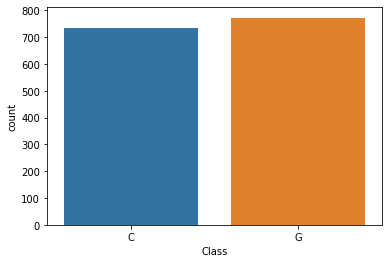

In [32]:
sns.countplot( x =letter['Class'])

In [33]:
#Đặt lại hai lớp với giá trị +1 and -1
variable['Label'] = variable['Class'].replace(to_replace = ['ham','spam'], value=[1,-1])

In [34]:
X = letter.drop('Class', axis = 1)
y = letter['Class']
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, train_size=0.8, random_state=101)

In [35]:
#có tác dụng chuyển đổi dữ liệu đào tạo và chỉ chuyển đổi dữ liệu kiểm tra
scaler_train= StandardScaler()
scaler_train.fit(X_train)
scaler_test= StandardScaler()
scaler_test.fit(X_test)
X_train_scaled= scaler_train.transform(X_train)
X_test_scaled= scaler_test.transform(X_test)

In [36]:
tree_model = DecisionTreeClassifier()
tree_model = tree_model.fit(X_train,y_train)
y_pred = tree_model.predict(X_test)

In [37]:
clf = AdaBoostClassifier(n_estimators=4, random_state=0)
clf.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=4, random_state=0)

In [40]:
clf.score(X_train, y_train)

0.8583264291632146

In [41]:
clf.score(X_test, y_test)

0.8642384105960265

In [42]:
#lắp mô hình DT với độ một sâu 
clf_gini = DecisionTreeClassifier(criterion = "gini", random_state = 200, max_depth=1)
clf = clf_gini.fit(X_train, y_train)

[Text(0.5, 0.75, 'X[11] <= 11.5\ngini = 0.5\nsamples = 1207\nvalue = [595, 612]'),
 Text(0.25, 0.25, 'gini = 0.406\nsamples = 779\nvalue = [221, 558]'),
 Text(0.75, 0.25, 'gini = 0.22\nsamples = 428\nvalue = [374, 54]')]

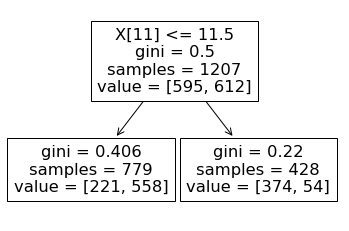

In [43]:
tree.plot_tree(clf)